# Teager Operator

## Part 1: Applying Teager Operator On a Signal

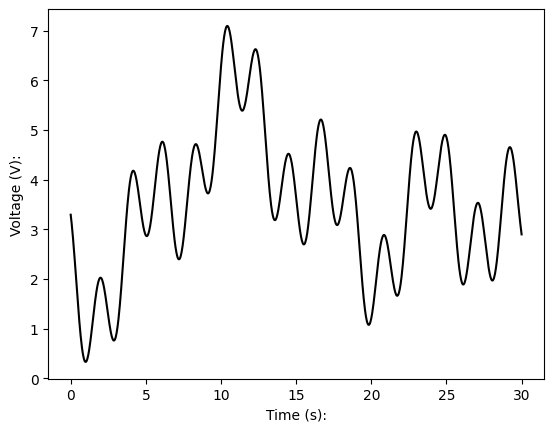

In [1]:
import matplotlib.pyplot as plt
import numpy as np

maxx = 30
x = np.linspace(0, maxx, 1000)

y = np.cos((2/10)*x+10)+np.cos((4/10)*x+2)+np.sin(x+3)+np.sin(3*x+2)+3.5
#y = 2*np.e**(-0.05*x)*np.sin(x*np.pi/4)

plt.plot(x, y, 'k')
plt.xlabel('Time (s):')
plt.ylabel('Voltage (V):')
plt.show()

### Above is the signal incoming from a particular sensor

#### The signal will be discreted at a sampling period of 1 second

301


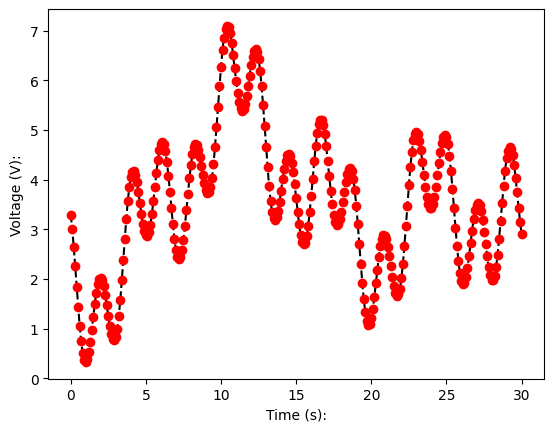

In [2]:
samplingPeriod = 0.1

samples = int(maxx/samplingPeriod) + 1

discretex = np.linspace(0 , maxx, samples)


discretey = np.cos((2/10)*discretex+10)+np.cos((4/10)*discretex+2)+np.sin(discretex+3)+np.sin(3*discretex+2)+3.5

#discretey = 2*np.e**(-0.05*discretex)*np.sin(discretex*np.pi/4)
print(len(discretex))
plt.plot(x, y, '--k')
plt.plot(discretex, discretey, 'or')
plt.xlabel('Time (s):')
plt.ylabel('Voltage (V):')
plt.show()

#### Above the red dots represent the discretized signal, the dashed line tracing the original

### Using the Teager Operator: 
### $$
  E_n = x_n^2 - x_{n+1}x_{n-1}
$$
### The Energy distribution of the signal will be found

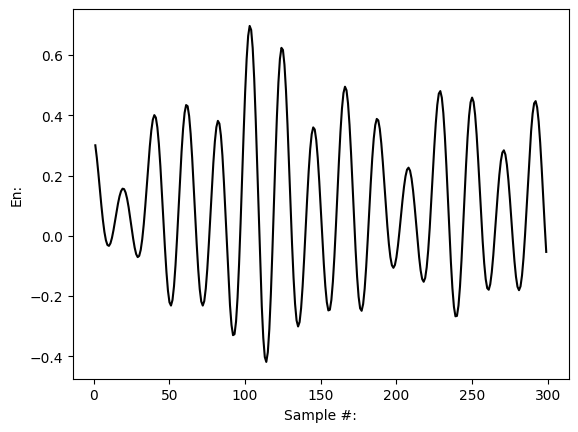

In [187]:
energyx = np.linspace(1,samples-2,samples-2)

lst = []
for n in energyx:
    n = int(n)
    lst.append(discretey[n]**2-discretey[n+1]*discretey[n-1])
energyy = np.array(lst)


plt.plot(energyx, energyy, 'k')
plt.xlabel('Sample #:')
plt.ylabel('En:')
plt.show()

## Part 2: Applying Teager Operator On a Grayscale Image

### The 2D Teager Operator will be applied on the following image:
![alt text](barbara.jpg)

### Using the 2D Teager Operator: 
### $$
  E[m,n] = 2x^2[m,n] - x[m-1,n]x[m+1,n] - x[m,n-1]x[m,n+1]
$$
### The Energy distribution of the image will be found

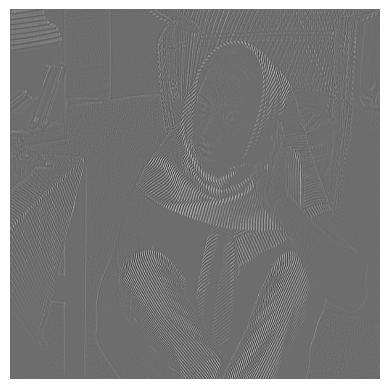

In [69]:
# Import the necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def normalize_array(array):
    min_value = np.min(array)
    max_value = np.max(array)

    normalized_array = (array - min_value) / (max_value - min_value) * 255
    normalized_array = normalized_array.astype(np.uint8)

    return normalized_array
# load the image and convert into
# numpy array
img = Image.open('barbara.jpg')
numpydata = np.asarray(img, dtype=np.int32)
output_image = np.zeros_like(numpydata, dtype=np.int32)
for m in range(1, numpydata.shape[0]-1):
    for n in range(1, numpydata.shape[1]-1):
        output_image[m, n] =  (2*numpydata[m, n]**2) - (numpydata[m-1, n] * numpydata[m+1, n]) - (numpydata[m, n-1] * numpydata[m, n+1])



output_img = Image.fromarray(output_image)
i = normalize_array(output_image)
#output_img2 = Image.fromarray(i)



fig,ax = plt.subplots()
ax.imshow(i, cmap='gray')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Part 3: Applying Gaussian Noise to an Image

### The following image will be taken and converted to a matrix then a noise matrix will be generated based on the chosen mean and standard deviation values, and added to the original image
![alt text](barbara.jpg)

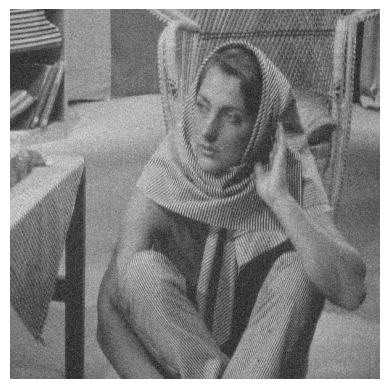

In [178]:
from PIL import Image
import numpy as np

originalImg = np.asarray(img, dtype=np.int32)


def add_gaussian_noise(array, mean=0, std=20):
    noise = np.random.normal(mean, std, array.shape)
    noisy_array = np.add(array,noise)
    return noisy_array

gaussianImg = add_gaussian_noise(originalImg)

gaussianImg = normalize_array(gaussianImg).astype('int32')


fig,ax = plt.subplots()
ax.imshow(gaussianImg, cmap='gray')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### The 2D Teager Operator will now be applied on the Image:

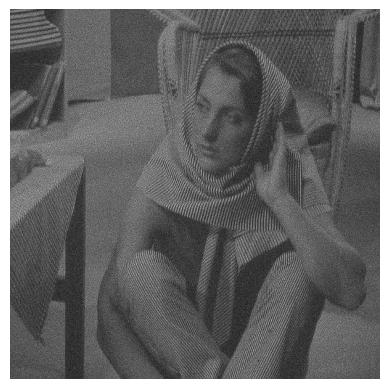

In [179]:
output_image = np.zeros_like(gaussianImg, dtype=np.int32)
for m in range(1, gaussianImg.shape[0]-1):
    for n in range(1, gaussianImg.shape[1]-1):
        output_image[m, n] =  (2*gaussianImg[m, n]**2) - (gaussianImg[m-1, n] * gaussianImg[m+1, n]) - (gaussianImg[m, n-1] * gaussianImg[m, n+1])

output_image = normalize_array(output_image)

i = normalize_array(np.add(output_image, gaussianImg))

fig,ax = plt.subplots()
ax.imshow(i, cmap='gray')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()